In [66]:
from cyclum import models

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
import pickle as pkl

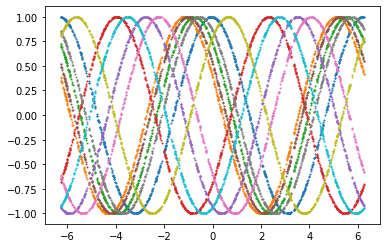

In [69]:
seed = 1
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 2000])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [70]:
gene = np.hstack([gene0, gene1, gene01])

In [71]:
model = models.AutoEncoder(input_width=gene.shape[1], 
                           encoder_depth=2, 
                           encoder_width=50, 
                           n_circular_unit=1,
                           n_logistic_unit=0,
                           n_linear_unit=0,
                           n_linear_bypass=0,
                           dropout_rate=0.1,
                           nonlinear_reg=1e-4)

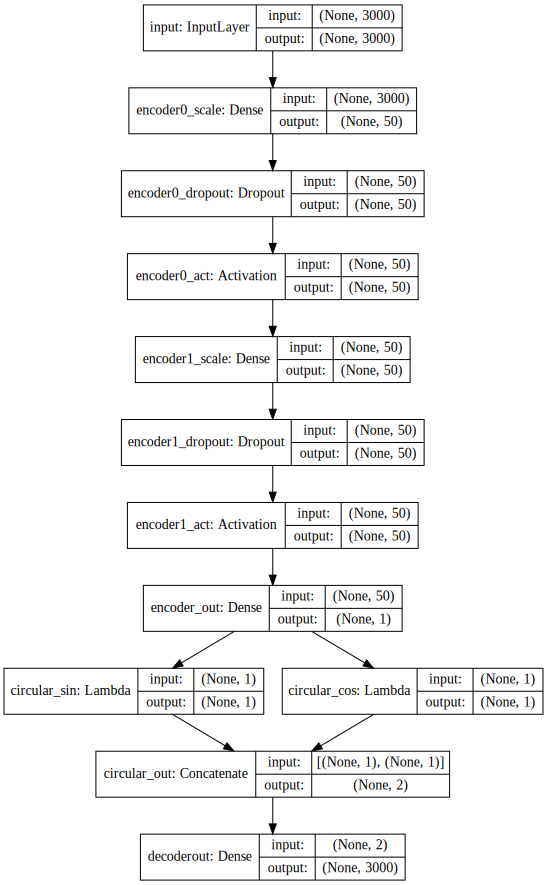

In [72]:
model.show_structure()

In [73]:
model.train(gene, epochs=1000, verbose=100, rate=1e-4)

epoch: 100/1000, loss:  0.5085, total train time:  10.13s
epoch: 200/1000, loss:  0.4363, total train time:  19.63s
epoch: 300/1000, loss:  0.4203, total train time:  29.27s
epoch: 400/1000, loss:  0.4147, total train time:  39.01s
epoch: 500/1000, loss:  0.4123, total train time:  48.84s
epoch: 600/1000, loss:  0.4134, total train time:  58.60s
epoch: 700/1000, loss:  0.4116, total train time:  68.46s
epoch: 800/1000, loss:  0.4119, total train time:  78.27s
epoch: 900/1000, loss:  0.4116, total train time:  88.07s
epoch: 1000/1000, loss:  0.4112, total train time:  97.82s


In [74]:
pseudotime = model.predict_pseudotime(gene)

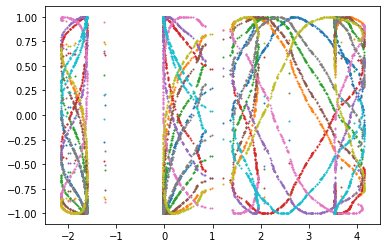

In [75]:
for i in range(10):
    plt.scatter(x=pseudotime[0], y=gene0[:, i], s=1)

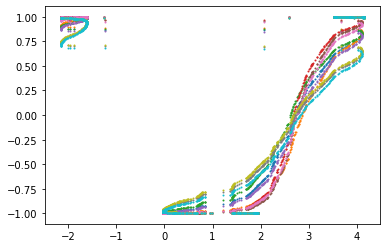

In [76]:
for i in range(10):
    plt.scatter(x=pseudotime[0], y=gene1[:, i], s=1)


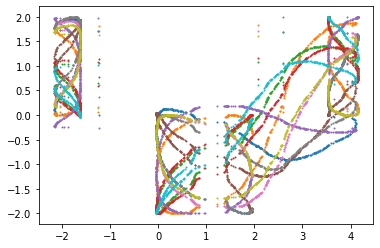

In [77]:
for i in range(10):
    plt.scatter(x=pseudotime[0], y=gene01[:, i], s=1)


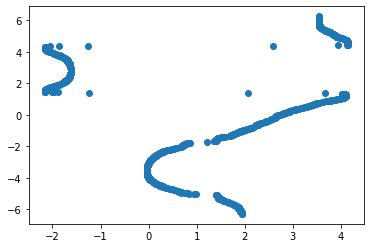

In [78]:
plt.scatter(pseudotime[0], cell_time)
